# Titanic Dataset
Kasey Cox / March 2017

### Question: Which passenger characteristics correlate with survival?

In [1]:
# General imports and functions
%autosave 0
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Autosave disabled


# Wrangle data

### Import data and preview it

In [2]:
# Import csv as DataFrame
titanic_df = pd.read_csv('titanic_data.csv', header=0)

In [3]:
# Make sure it worked...
print titanic_df.tail()
print "\n" + "No. passengers:", titanic_df.shape[0]

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  

No. passengers: 891


### Clean up data:
- change confusing/unclear column names to easily recognizable ones
- Transform 'Survived' column values into descriptive values (e.g. 0 --> 'Died')
- Transform 'Pclass' column values into descriptive values (e.g. 3 --> 'Third Class')
- Transform 'Embarked' values to the actual names of the ports

In [4]:
# Existing columns
print "No. columns:", titanic_df.shape[1], "\n"
print titanic_df.columns

No. columns: 12 

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [5]:
# Change to desired column names
new_col_names = ['Passenger_ID', 'Survived', 'Class', 'Name', 'Sex', 'Age',
       'Siblings_spouses_aboard', 'Parents_children_aboard', 'Ticket', 'Fare', 'Cabin_num', 'Port_of_Embarkation']
titanic_df.columns = new_col_names
print titanic_df.columns

Index([u'Passenger_ID', u'Survived', u'Class', u'Name', u'Sex', u'Age',
       u'Siblings_spouses_aboard', u'Parents_children_aboard', u'Ticket',
       u'Fare', u'Cabin_num', u'Port_of_Embarkation'],
      dtype='object')


In [6]:
# Transforming 'Survived' column values
titanic_df['Survived'] = titanic_df['Survived'].map({0:'Died', 1:'Survived'})

# Checking that it worked...
print titanic_df['Survived'].head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survived, dtype: object


In [7]:
# Transforming 'Class' column values
titanic_df['Class'] = titanic_df['Class'].map({1:'First Class', 2:'Second Class', 3:'Third Class'})

# Checking that it worked...
print titanic_df['Class'].head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object


In [8]:
# Transforming 'Port' column values
titanic_df['Port_of_Embarkation'] = titanic_df['Port_of_Embarkation'].map({'S':'Southampton', \
                                                                           'C':'Cherbourg', 'Q':'Queenstown'})

# Checking that it worked...
print titanic_df['Port_of_Embarkation'].head()

0    Southampton
1      Cherbourg
2    Southampton
3    Southampton
4    Southampton
Name: Port_of_Embarkation, dtype: object


# Exploration

To answer my question, I need to first choose passenger characteristics to test against survival. Second, I will want to graph or plot the data; this will give me a preview of the data and allow me to pick out any obvious patterns. If appropriate, I would need to statistically determine if there is any relationship between the variables.

## 1. Determine variables to test against survival
- find number of NaNs present in a column
- pick variables

In [9]:
# Check for NaNs in each column
print "NaNs present in columns"
print "-----------------------"
for col in titanic_df.columns:
    print str(col) + ":", titanic_df[titanic_df[col].isnull()].shape[0]

NaNs present in columns
-----------------------
Passenger_ID: 0
Survived: 0
Class: 0
Name: 0
Sex: 0
Age: 177
Siblings_spouses_aboard: 0
Parents_children_aboard: 0
Ticket: 0
Fare: 0
Cabin_num: 687
Port_of_Embarkation: 2


I will handle NaNs in the data when I analyse variables that contain them.

The 'Survived' column represents survival as either a 0 (died) or a 1 (survived).

__Variables that seem like they might be connected to one's survival aboard the Titanic and that will be investigated:__
- Sex
    - Social convention may spare women
- Class
    - Higher class passengers may be favored
    - Higher class passengers' cabins were closer to the boat deck where the lifeboats were housed
- Fare
    - Likely correlates with passenger class (if class correlates with survival, then so will this).
- Age
    - Maybe social convention favored saving the young?
    - This one may be tricky because many entries are missing
    
__Variables that seem useless; not investigating:__
- Passenger ID
    - Appear to be arbitrarily assigned
- Ticket
    - Appear to be arbitrarily assigned
- Cabin number
    - Too many missing entries to be useful
    
__Variables that may or may not be insightful; not investigating:__
- Parents_children_aboard
    - Social convention may spare women (mothers) and children
- Name
- Siblings_spouses_aboard
- Embarked

## 2. Plot/graph variables and mathematically explore

## Passenger Sex

In [10]:
# Variables
print titanic_df['Sex'].unique()
print titanic_df['Survived'].unique()

['male' 'female']
['Died' 'Survived']


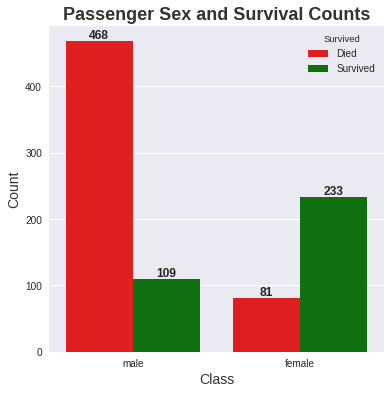

In [11]:
# Plot
sex_v_survival =  titanic_df[['Sex', 'Survived']]
plt_clrs = ['green' if (x == 'Survived') else 'red' for x in sex_v_survival['Survived']]    # red for dead, green for survived
g = sns.countplot(x='Sex', hue='Survived', data=sex_v_survival, palette=plt_clrs)

# Modify appearance
g.axes.set_title('Passenger Sex and Survival Counts', fontsize=18, fontweight='bold', color="k", alpha=0.8)
g.set_xlabel("Class", size = 14, color="k", alpha=0.8)
g.set_ylabel("Count", size = 14, color="k", alpha=0.8)
g.figure.set_size_inches(6,6)
sns.set_style("whitegrid")

# Get bars and create bar labels
bars_list =  g.patches          # axis.patches gives the bar objects produced by the plot
male_deaths = len(sex_v_survival[(sex_v_survival['Sex'] == 'male') & (sex_v_survival['Survived'] == 'Died')])
male_survivors = len(sex_v_survival[(sex_v_survival['Sex'] == 'male') & (sex_v_survival['Survived'] == 'Survived')])
female_deaths = len(sex_v_survival[(sex_v_survival['Sex'] == 'female') & (sex_v_survival['Survived'] == 'Died')])
female_survivors = len(sex_v_survival[(sex_v_survival['Sex'] == 'female') & (sex_v_survival['Survived'] == 'Survived')])
bar_labels = [str(freq) for freq in [male_deaths, female_deaths, male_survivors,female_survivors]]

# Place bar labels
for bar, label in zip(bars_list, bar_labels):        # iterate through these 
    g.text((bar.get_x() + bar.get_width()/2), (bar.get_height() + 4), label, ha='center', size=12, fontweight='bold')

In [12]:
# Males
total_males = len(sex_v_survival[sex_v_survival['Sex'] == 'male'])
print 'Total males:', total_males
print 'Male deaths:', male_deaths
print '% dead:', (male_deaths/float(total_males))*100, "\n"

# Females
total_females = len(sex_v_survival[sex_v_survival['Sex'] == 'female'])
print 'Total females:', len(sex_v_survival[sex_v_survival['Sex'] == 'female'])
print 'Female deaths:', len(sex_v_survival[(sex_v_survival['Sex'] == 'female') & (sex_v_survival['Survived'] == 'Died')])
print '% dead:', (female_deaths/float(total_females))*100

Total males: 577
Male deaths: 468
% dead: 81.1091854419 

Total females: 314
Female deaths: 81
% dead: 25.7961783439


The most deaths, in absolute terms and in terms of percent, were of men.
> Total males: 577
>
> Male deaths: 468
>
> __% dead: 81.1091854419__

Female death rate is much lower than that of men.
>Total females: 314
>
>Female deaths: 81
>
> __% dead: 25.7961783439__

__Sex seems to affect survival__, let's prove it with a Pearson's chi-squared test for goodness of fit! 
- I am picking this test because sex is a categorical variable, so tests like t-tests are inappropriate here.
- The overall death rate for a passenger aboard the Titanic (sex not considered) is 0.62
    - 549 / 891
    - total deaths / all passengers

Hypotheses:
>H<sub>0</sub>: The death rate for males and females is 0.62
>
>H<sub>1</sub>: The death rate for males and females is __not__ 0.62

Confidence level: 99% ($\alpha$ = 0.01)

In [13]:
# Construct a frequency distribution table
obs_sex = pd.DataFrame(['Non-survivors, male']*male_deaths + ['Survivors, male']*(total_males - male_deaths) +\
                        ['Non-survivors, female']*female_deaths + ['Survivors, female']*(total_females - female_deaths))
obs_sex_table = pd.crosstab(index=obs_sex[0], columns="counts")
print 'Observed counts'
print obs_sex_table['counts'], '\n'

# Get expected frequencies (observed is obs_sex_table)
survivors_total = len(titanic_df[titanic_df['Survived'] == 'Survived'])
deaths_total = len(titanic_df[titanic_df['Survived'] == 'Died'])
passengers_total = total_females + total_males
exp_table = pd.Series({'Non-survivors, female': ((deaths_total/float(passengers_total))*total_females), \
                          'Non-survivors, male': ((deaths_total/float(passengers_total))*total_males), \
                          'Survivors, female': ((survivors_total/float(passengers_total))*total_females), \
                          'Survivors, male': ((survivors_total/float(passengers_total))*total_males)})
print 'Expected counts if sex does not influence'
print exp_table, '\n'

# Pearson's chi-squared test (goodness of fit)
sex_v_surv_chisquared =  stats.chisquare(obs_sex_table['counts'], f_exp=exp_table, ddof=1, axis=None)
sex_crit = stats.chi2.ppf(q = 0.99, df = 1)

# Report
print 'Chi-squared statistic:', sex_v_surv_chisquared[0]
print 'Chi-squared critical @ p=0.01:', sex_crit
print 'p-value:', sex_v_surv_chisquared[1]

Observed counts
0
Non-survivors, female     81
Non-survivors, male      468
Survivors, female        233
Survivors, male          109
Name: counts, dtype: int64 

Expected counts if sex does not influence
Non-survivors, female    193.474747
Non-survivors, male      355.525253
Survivors, female        120.525253
Survivors, male          221.474747
dtype: float64 

Chi-squared statistic: 263.050574071
Chi-squared critical @ p=0.01: 6.63489660102
p-value: 7.57344733665e-58


Test conditions and results:
> Chi-squared critical @ p=0.01: 6.63489660102
>
> Chi-squared statistic result: 263.050574071
>
> Calculated p-value: 7.57344733665e-58
>
> Null hypothesis rejected at p=0.01

Interpretation: 
>__Survival based on sex is NOT by random chance__-- extremely tiny probability that this pattern was seen by random chance.
>
> __If a passenger is female, she is more likely to survive than her male counterparts.__

## Passenger class

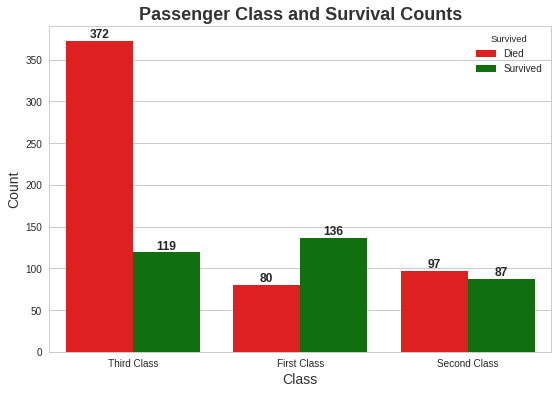

In [14]:
# Plot
class_v_survival =  titanic_df[['Class', 'Survived']]
plt_clrs = ['green' if (x == 'Survived') else 'red' for x in class_v_survival['Survived']]   #red for dead, green for survived
g = sns.countplot(x='Class', hue='Survived', data=class_v_survival, palette=plt_clrs)
g.figure.set_size_inches(8,4)

# Modify appearance
sns.set_style("whitegrid")
g.axes.set_title('Passenger Class and Survival Counts', fontsize=18, fontweight='bold', color="k", alpha=0.8)
g.set_xlabel("Class", size = 14, color="k", alpha=0.8)
g.set_ylabel("Count", size = 14, color="k", alpha=0.8)
g.figure.set_size_inches(9,6)

# Get bars and create bar labels
bars_list =  g.patches          # axis.patches gives the bar objects produced by the plot
first_class_deaths = len(class_v_survival[(class_v_survival['Class'] == 'First Class') & \
                                          (class_v_survival['Survived'] == 'Died')])
first_class_survivors = len(class_v_survival[(class_v_survival['Class'] == 'First Class') & \
                                             (class_v_survival['Survived'] == 'Survived')])
second_class_deaths = len(class_v_survival[(class_v_survival['Class'] == 'Second Class') & \
                                           (class_v_survival['Survived'] == 'Died')])
second_class_survivors = len(class_v_survival[(class_v_survival['Class'] == 'Second Class') & \
                                              (class_v_survival['Survived'] == 'Survived')])
third_class_deaths = len(class_v_survival[(class_v_survival['Class'] == 'Third Class') & \
                                          (class_v_survival['Survived'] == 'Died')])
third_class_survivors = len(class_v_survival[(class_v_survival['Class'] == 'Third Class') & \
                                             (class_v_survival['Survived'] == 'Survived')])
label_list = [third_class_deaths, first_class_deaths, second_class_deaths, \
              third_class_survivors, first_class_survivors, second_class_survivors]
bar_labels = [str(freq) for freq in label_list]

# Place bar labels
for bar, label in zip(bars_list, bar_labels):
    g.text((bar.get_x() + bar.get_width()/2), (bar.get_height() + 4), label, ha='center', size=12, fontweight='bold')

In [15]:
# 1st class
total_first_class = len(class_v_survival[class_v_survival['Class'] == 'First Class'])
print 'Total 1st class:', total_first_class
print '1st class deaths:', first_class_deaths
print '% dead:', (first_class_deaths/float(total_first_class))*100, "\n"

# 2nd class
total_second_class = len(class_v_survival[class_v_survival['Class'] == 'Second Class'])
print 'Total 2nd class:', total_second_class
print '2nd class deaths:', second_class_deaths
print '% dead:', (second_class_deaths/float(total_second_class))*100, "\n"

# 3rd class
total_third_class = len(class_v_survival[class_v_survival['Class'] == 'Third Class'])
print 'Total 3rd class:', total_third_class
print '3rd class deaths:', third_class_deaths
print '% dead:', (third_class_deaths/float(total_third_class))*100, "\n"

Total 1st class: 216
1st class deaths: 80
% dead: 37.037037037 

Total 2nd class: 184
2nd class deaths: 97
% dead: 52.7173913043 

Total 3rd class: 491
3rd class deaths: 372
% dead: 75.7637474542 



1st class survival rate:
> % dead: 37.037037037

2nd class survival rate:
> % dead: 52.7173913043

3rd class survival rate:
> % dead: 75.7637474542 

__Class appears to correlate with survival__, let's demonstrate it with a Pearson's chi-squared test for goodness of fit!!!!
- I am picking this test because class is a categorical variable, so tests like t-tests are inappropriate here.
- The overall death rate for a passenger aboard the Titanic (class not considered) is 0.62
    - 549 / 891
    - total deaths / all passengers

Hypotheses:
>H<sub>0</sub>: The death rate for 1st class passengers, 2nd class passengers, and 3rd class passengers is 0.62 for each class.
>
>H<sub>1</sub>: The death rate for 1st class passengers, 2nd class passengers, __or__ 3rd class passengers is __not__ 0.62.

Confidence level: 99% ($\alpha$ = 0.01)

In [16]:
# Construct a frequency distribution table
obs_class = pd.DataFrame(['1st class deaths']*first_class_deaths + ['2nd class deaths']*second_class_deaths +\
                        ['3rd class deaths']*third_class_deaths + ['1st class survivors']*(total_first_class - \
                                                                                           first_class_deaths) +\
                        ['2nd class survivors']*(total_second_class - second_class_deaths) +\
                        ['3rd class survivors']*(total_third_class - third_class_deaths))
obs_class_table = pd.crosstab(index=obs_class[0], columns="counts")
print 'Observed rates'
print obs_class_table['counts']
print

# Get expected frequencies
death_ratio = (deaths_total/float(passengers_total))
surv_ratio = (survivors_total/float(passengers_total))
exp_class = pd.Series({'1st class deaths': (death_ratio*total_first_class), \
                       '1st class survivors': (surv_ratio*total_first_class), \
                       '2nd class deaths': (death_ratio*total_second_class), \
                       '2nd class survivors': (surv_ratio*total_second_class), \
                       '3rd class deaths': (death_ratio*total_third_class), \
                       '3rd class survivors': (surv_ratio*total_third_class)})
print 'Expected rates if class does not influence'
print exp_class
print

# Pearson's chi-squared test for goodness of fit
class_v_surv_chisquared =  stats.chisquare(obs_class_table['counts'], f_exp=exp_class, ddof=2, axis=None)
class_crit = stats.chi2.ppf(q = 0.99, df = 2)        # t-critical value

# Report
print 'Chi-squared stat:', class_v_surv_chisquared[0]
print 'Critical value @ p=0.01:', class_crit
print 'p-value:', class_v_surv_chisquared[1]

Observed rates
0
1st class deaths        80
1st class survivors    136
2nd class deaths        97
2nd class survivors     87
3rd class deaths       372
3rd class survivors    119
Name: counts, dtype: int64

Expected rates if class does not influence
1st class deaths       133.090909
1st class survivors     82.909091
2nd class deaths       113.373737
2nd class survivors     70.626263
3rd class deaths       302.535354
3rd class survivors    188.464646
dtype: float64

Chi-squared stat: 102.888988757
Critical value @ p=0.01: 9.21034037198
p-value: 3.71728275658e-22


Test conditions and results:
> Critical value @ p=0.01: 9.21034037198
>
> Chi-squared statistic result: 102.888988757
>
> Calculated p-value: 3.71728275658e-22
>
>Null hypothesis rejected at p=0.01

Interpretation: 
>__Survival based on class is NOT by random chance__-- extremely tiny probability that this pattern was seen by random chance.
>
> __The higher a passenger's class, the more likely that the passenger survives.__

## Passenger Fare

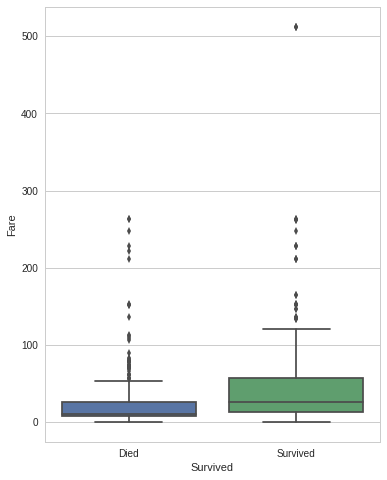

In [17]:
# Initial boxplot of fare data
bx_plt = sns.boxplot(x=titanic_df['Survived'], y=titanic_df['Fare'])
bx_plt.figure.set_size_inches(6,8)

The extreme outliers make it difficult to see the boxplot features. Let's remove extreme value(s) (fare >= 200) to improve the visualization.

In [18]:
# Extreme value(s) in survived category
print "No. extreme outliers (fare > 200):", len(titanic_df[titanic_df['Fare'] >= 200]), '\n'
print 'First 5 of 20:' + '\n', titanic_df[titanic_df['Fare'] >= 200].head()

No. extreme outliers (fare > 200): 20 

First 5 of 20:
     Passenger_ID  Survived        Class  \
27             28      Died  First Class   
88             89  Survived  First Class   
118           119      Died  First Class   
258           259  Survived  First Class   
299           300  Survived  First Class   

                                                Name     Sex   Age  \
27                    Fortune, Mr. Charles Alexander    male  19.0   
88                        Fortune, Miss. Mabel Helen  female  23.0   
118                         Baxter, Mr. Quigg Edmond    male  24.0   
258                                 Ward, Miss. Anna  female  35.0   
299  Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0   

     Siblings_spouses_aboard  Parents_children_aboard    Ticket      Fare  \
27                         3                        2     19950  263.0000   
88                         3                        2     19950  263.0000   
118                        0

In [19]:
# Removing these values; RUN ONLY ONCE
no_xtreme_outliers_df = titanic_df[titanic_df['Fare'] < 200].reset_index(drop=True)

In [20]:
# Checking that it worked
no_xtreme_outliers_df.shape

(871, 12)

Now that these extreme values are removed, let's re-plot the data and get some descriptive statistics.

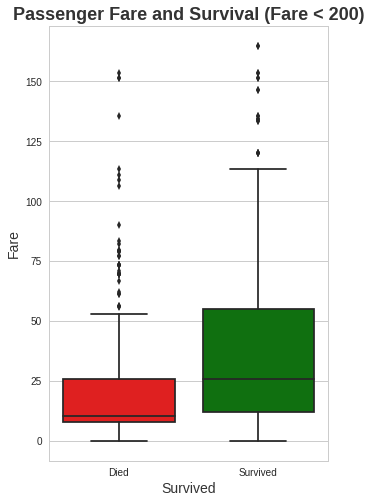

In [21]:
# Plot
plt_clrs = ['green' if (x == 'Survived') else 'red' for x in no_xtreme_outliers_df['Survived']]   \
                                                                              #red for dead, green for survived
bx_plt = sns.boxplot(x=no_xtreme_outliers_df['Survived'], y=no_xtreme_outliers_df['Fare'], palette=plt_clrs)

# Modify appearance
bx_plt.axes.set_title('Passenger Fare and Survival (Fare < 200)', fontsize=18, fontweight='bold', color="k", alpha=0.8)
bx_plt.set_xlabel("Survived", size = 14, color="k", alpha=0.8)
bx_plt.set_ylabel("Fare", size = 14, color="k", alpha=0.8)
bx_plt.figure.set_size_inches(5,8)

In [22]:
# Descriptive statistics
titanic_by_survival = no_xtreme_outliers_df.groupby('Survived')
print titanic_by_survival['Fare'].describe(percentiles=[0.5])

Survived       
Died      count    543.000000
          mean      19.720801
          std       21.562705
          min        0.000000
          50%       10.462500
          max      153.462500
Survived  count    328.000000
          mean      37.802998
          std       36.289537
          min        0.000000
          50%       26.000000
          max      164.866700
Name: Fare, dtype: float64


Surviving passenger fares:
> Range: 164.87
>
> Median: 26.00
>
> Mean: 37.80
>
> SD: 36.29

Non-surviving passenger fares:
> Range: 153.46
>
> Median: 10.46
>
> Mean: 19.72
>
> SD: 21.56


There appears to be a great deal of overlap amongst fares. I noticed this when I printed out the the first five entries of extreme outliers with fares above 200. All were for first class, but some fares were more than 500 when others were closer to 250.

__Are different prices paid for the same class?__ If so, why? Does this have to do with any other variable present in the data set?

Maybe the place of embarkation has something to do with this; it is feasible that one place charges more or less for a ticket of the same class compared to another place.

In [23]:
# Checking out the ports
print titanic_df['Port_of_Embarkation'].unique()
print titanic_df.shape

['Southampton' 'Cherbourg' 'Queenstown' nan]
(891, 12)


Recall: only two NaNs present in 'Port_of_Embarkation' column, so ignore them in exploration by removing them.

In [24]:
# Removing 'Port_of_Embarkation' entries with NaN; RUN ONLY ONCE
cleaned_embark_df = titanic_df[titanic_df['Port_of_Embarkation'].notnull()]

In [25]:
# Checking that it worked
print cleaned_embark_df.shape
print cleaned_embark_df['Port_of_Embarkation'].unique()

(889, 12)
['Southampton' 'Cherbourg' 'Queenstown']


With those NaN 'Port_of_Embarkation' column entries removed, let's visualize survival, fare, and port.

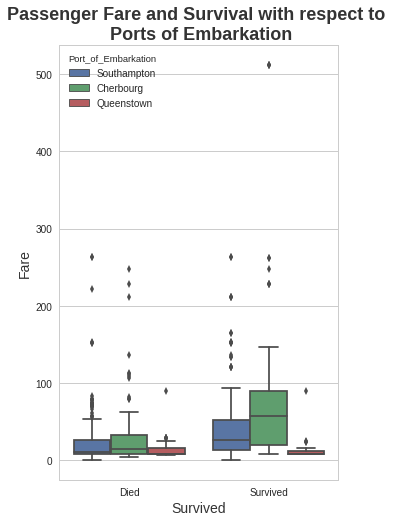

In [26]:
# Plot
bx_plt = sns.boxplot(x=cleaned_embark_df['Survived'], y=cleaned_embark_df['Fare'], \
                     hue=cleaned_embark_df['Port_of_Embarkation'])

# Modify appearance
bx_plt.axes.set_title('Passenger Fare and Survival with respect to \n Ports of Embarkation', \
                      fontsize=18, fontweight='bold', color="k", alpha=0.8)
bx_plt.set_xlabel("Survived", size = 14, color="k", alpha=0.8)
bx_plt.set_ylabel("Fare", size = 14, color="k", alpha=0.8)
bx_plt.figure.set_size_inches(5,8)

It's hard to see the finer details because of the extreme outliers (Fare > 500) from the survived, Cherbourg group. Let's remove that for a better visualization.

In [27]:
# Removing these values; RUN ONLY ONCE
cleaned_embark_df = cleaned_embark_df[cleaned_embark_df['Fare'] < 500].reset_index(drop=True)

In [28]:
# Checking that it worked...
cleaned_embark_df.shape

(886, 12)

Let's replot since those are now removed.

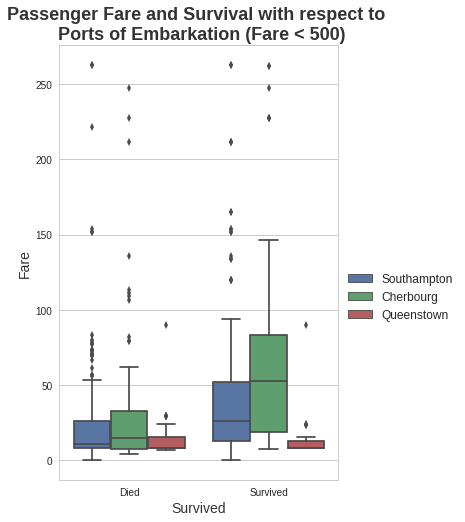

In [29]:
# Plot
bx_plt = sns.boxplot(x=cleaned_embark_df['Survived'], y=cleaned_embark_df['Fare'], \
                     hue=cleaned_embark_df['Port_of_Embarkation'])

# Modify appearance
bx_plt.axes.set_title('Passenger Fare and Survival with respect to \n Ports of Embarkation (Fare < 500)', \
                      fontsize=18, fontweight='bold', color="k", alpha=0.8)
bx_plt.set_xlabel("Survived", size = 14, color="k", alpha=0.8)
bx_plt.set_ylabel("Fare", size = 14, color="k", alpha=0.8)
bx_plt.figure.set_size_inches(5,8)
plt.legend(bbox_to_anchor=(1.45, 0.5), fontsize='large')

On first glance, it looks like tickets from Cherbourg are generally the more expensive than both Southampton and Queenstown. Queenstown generally seems to have the cheapest fare. Cherbourg also looks like it has a lot of spread overall, but especially in terms of those who survived.

Let's get some descriptive statistics...

In [31]:
# Grouping
fare_port_groups = cleaned_embark_df.groupby(['Survived', 'Port_of_Embarkation'])

# Checking what I have...
for group in fare_port_groups.groups:
    print group

('Died', 'Southampton')
('Survived', 'Queenstown')
('Survived', 'Cherbourg')
('Survived', 'Southampton')
('Died', 'Queenstown')
('Died', 'Cherbourg')


In [32]:
# Getting some descriptive statistics
print fare_port_groups['Fare'].describe(percentiles=[0.5])

Survived  Port_of_Embarkation       
Died      Cherbourg            count     75.000000
                               mean      35.443335
                               std       49.617218
                               min        4.012500
                               50%       14.458300
                               max      247.520800
          Queenstown           count     47.000000
                               mean      13.335904
                               std       13.550636
                               min        6.750000
                               50%        7.750000
                               max       90.000000
          Southampton          count    427.000000
                               mean      20.743987
                               std       27.896824
                               min        0.000000
                               50%       10.500000
                               max      263.000000
Survived  Cherbourg            count     90.0

__Ports and fares of survivors and non-survivors__

- Port C:
    - Non-survivors (0):
        - Median fare: 14.46
        - Mean fare: 35.44
        - SD: 49.61
    - Survivors (1):
        - Median fare: 52.48
        - Mean fare: 65.30
        - SD: 61.09
        > Although there is a good deal of spread present for both groups (but more so with survivors), __survivors generally have a greater fare__.
        >
        > The very large spread within Port C might indicate that many different classes boarded at this port. I can make this (educated) guess owing to the fact that I know upper class generally costs more (so fare and class are related) and because class correlates positive with survival.
        >
        > This could be further explored.


- Port Q:
    - Non-survivors:
        - Median fare: 7.75
        - Mean fare: 13.34
        - SD: 13.55
    - Survivors:
        - Median fare: 7.81
        - Mean fare: 13.18
        - SD: 15.37
        > __Survivors generally have a greater fare.__
        >
        > There is little spread in this port (compared to port C and S). This makes me suspicious that most of 3rd class boarded here.
        
- Port S:
    - Non-survivors:
        - Median fare: 10.50
        - Mean fare: 20.74
        - SD: 27.90
    - Survivors:
        - Median fare: 26.00
        - Mean fare: 39.55
        - SD: 45.43
        > __Survivors generally have a greater fare.__

I am not going to do a hypothesis test on passenger fare because I believe there are too many factors affecting fare to make it overly insightful.

__I can say, from an observational viewpoint, that generally survivors have greater fares than non-survivors__ because the difference are quite large to the naked eye; though I have not statistically demonstrated this.

### Age
This one may be tricky because many entries are missing; my approach will ignore entries that have no age listed.

In [33]:
# Remove entries with NaN for age
age_nan_removed_df = titanic_df[titanic_df['Age'].notnull()].reset_index(drop=True)

In [34]:
# Making sure it worked...
print age_nan_removed_df.shape

(714, 12)


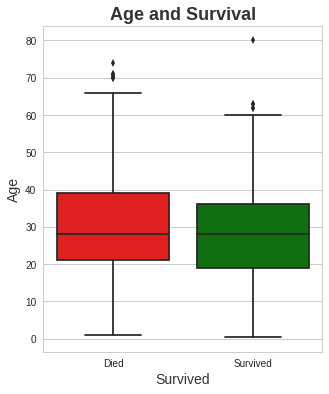

In [35]:
# Plot
plt_clrs = ['green' if (x == 'Survived') else 'red' for x in age_nan_removed_df['Survived']] \
                        #red for dead, green for survived
bx_plt = sns.boxplot(x=age_nan_removed_df['Survived'], y=age_nan_removed_df['Age'], palette=plt_clrs)

# Modify appearance
bx_plt.axes.set_title('Age and Survival', fontsize=18, fontweight='bold', color="k", alpha=0.8)
bx_plt.set_xlabel("Survived", size = 14, color="k", alpha=0.8)
bx_plt.set_ylabel("Age", size = 14, color="k", alpha=0.8)
bx_plt.figure.set_size_inches(5,6)

There appears to be no significant difference between survivors and non-survivors. Let's get some descriptive statistics.

In [36]:
# Group age by survival
print age_nan_removed_df.groupby('Survived')['Age'].describe(percentiles=[0.5])

Survived       
Died      count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          50%       28.000000
          max       74.000000
Survived  count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          50%       28.000000
          max       80.000000
Name: Age, dtype: float64


__Descriptive statistics summary__

Non-survivors:
> Median:  28.00
>
> Mean: 30.63
>
> SD: 14.17

Survivors:
> Median:  28.00
>
> Mean: 28.34
>
> SD: 14.95

The results are nearly identical, suggesting that there is no significant difference in survival based on age.

Let's do a two sample t-test for independent samples to confirm this hunch.

Hypotheses (two-sided):
>H<sub>0</sub>: $\mu$<sub>0</sub> = $\mu$<sub>1</sub>
>
>H<sub>1</sub>: $\mu$<sub>0</sub> $\neq$ $\mu$<sub>1</sub>

_Where $\mu$<sub>0</sub> is the non-survivor population mean and 
$\mu$<sub>1</sub> is the survivor population mean._

Confidence level: 99% ($\alpha$ = 0.01)

In [38]:
# Two sample t-test for independent samples, two-sided
age_surv_ttest = stats.ttest_ind(a=age_nan_removed_df[age_nan_removed_df['Survived'] == 'Died']['Age'], \
                                 b=age_nan_removed_df[age_nan_removed_df['Survived'] == 'Survived']['Age'])

# Results
print 'T-critical value at p=0.01:', u"\u00B1" + str(stats.t.ppf(q=0.995, df=341))   # quantile to check and d.o.f.
print 'T-statistic result:', age_surv_ttest[0]
print 'Calculated p-value:', age_surv_ttest[1]

T-critical value at p=0.01: ±2.59032361655
T-statistic result: 2.06668694625
Calculated p-value: 0.0391246540135


Test conditions and results:
> T-critical values at p=0.01: $\pm$2.590
>
> T statistic result: 2.067
>
> Calculated p-value: 0.039
>
> Null hypothesis rejected at p=0.01 (but not at 0.05 according to calculated p-value).

Interpretation: 
> Survival based on age appears to be borderline random. There is about a 4% chance that we would see the difference that we do between the groups.
>
> The difference that I can see in the boxplot is that the survived 50% of values are shifted down (very modestly) in age compared to the non-survivor group.

# Conclusions

I investigated the four variables (passenger characteristics) in terms of their relationship to survival: sex, class, fare, and age. The analysis leading up to each conclusion is detailed in above sections.

__Passenger sex correlates with survival:__ females were more likely to survive than males.

__Passenger class correlates with survival:__ the higher the passenger's class, the more likely that he or she survived.

__Passenger fare likely correlates with survival:__ confounding variaibles like port and class affect the results, so it is hard to say for certain.

__Passenger age weakly correlates with survival:__ there is an extremely modest difference between surviving and non-surviving passengers with respect to age; so it is difficult to say there is definitely a correlation.